Autoencoders

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

FEATURE_FILES = ["features_rgbw.npy", "features_hog.npy", "features_lbp.npy", "features_fda.npy", "features_ela.npy", "features_lbpv.npy", "features_colorgamut.npy", "features_fractal.npy"]
CACHE_FILE = "autoencoder.npy"

# Load all feature sets
features_list = [np.load(f) for f in FEATURE_FILES]
features = np.concatenate(features_list, axis=1)

# Define Autoencoder architecture
input_dim = features.shape[1]

encoder = keras.Sequential([
    layers.InputLayer(input_shape=(input_dim,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),  # Bottleneck layer
])

decoder = keras.Sequential([
    layers.InputLayer(input_shape=(64,)),
    layers.Dense(128, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(input_dim, activation="sigmoid"),  # Output same shape as input
])

autoencoder = keras.Sequential([encoder, decoder])
autoencoder.compile(optimizer="adam", loss="mse")

# Train Autoencoder
autoencoder.fit(features, features, epochs=50, batch_size=256, verbose=1)

# Extract compressed features
features_autoencoder = encoder.predict(features)

# Save
np.save(CACHE_FILE, features_autoencoder)
print(f"Saved Autoencoder features to {CACHE_FILE}")

e:\Coding\Advanced ML\.venv\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 17781.3008
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17628.3398
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17652.5098
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17618.2637
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17660.2734
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17635.4473
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17707.3379
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17757.4082
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17683.2520
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17696.0215
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17719.6895
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17766.0059
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17689.8926
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17751.1152
Epoch 15/50
79/79 ━━━━━━━━━━━

Plot

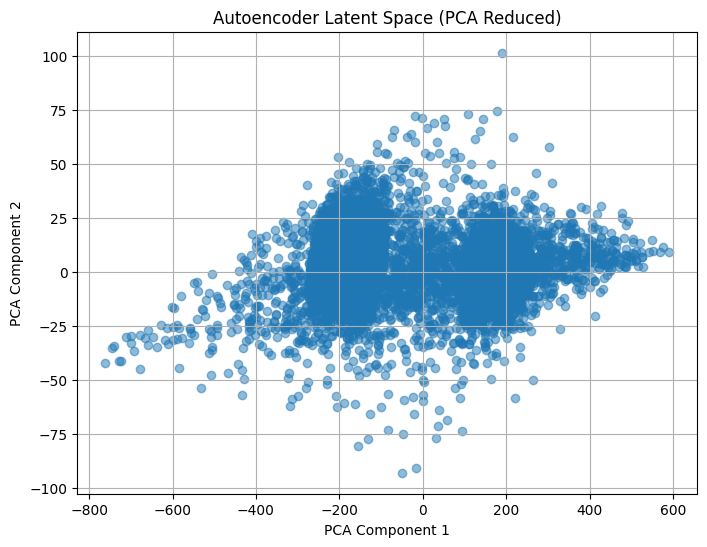

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load encoded features
features_autoencoder = np.load("autoencoder.npy")

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_autoencoder)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(features_2d[:, 0], features_2d[:, 1], alpha=0.5)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Autoencoder Latent Space (PCA Reduced)")
plt.grid()
plt.show()

e:\Coding\Advanced ML\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
e:\Coding\Advanced ML\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
e:\Coding\Advanced ML\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


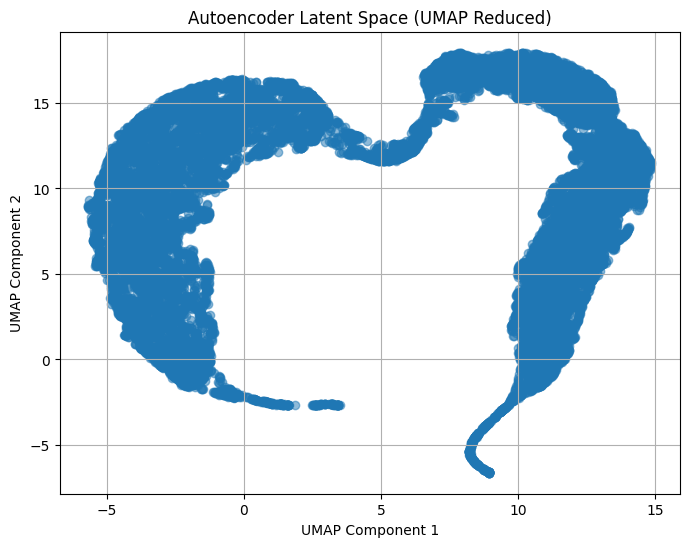

In [3]:
import umap

umap_reducer = umap.UMAP(n_components=2, random_state=42)
features_umap = umap_reducer.fit_transform(features_autoencoder)

plt.figure(figsize=(8, 6))
plt.scatter(features_umap[:, 0], features_umap[:, 1], alpha=0.5)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("Autoencoder Latent Space (UMAP Reduced)")
plt.grid()
plt.show()